In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.stats import norm
from statsmodels.base.model import GenericLikelihoodModel
import seaborn as sns
sns.set_palette("muted")
sns.set_color_codes()
sns.set_style("ticks")
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})
sns.set_style({"axes.grid": "True", "grid.color": "0.95"})

plt.rcParams["figure.figsize"] = [6,6]
plt.rcParams["figure.dpi"] = 100

In [2]:
import matplotlib as mpl
def darken_color(color, p):
    return (color[0]*p,color[1]*p,color[2]*p)

colors = sns.color_palette("muted") + [(.1, .1, .1)]
for code, color in zip(["bd","gd","rd","md","yd","cd","kd"], colors):
    rgb = mpl.colors.colorConverter.to_rgb(darken_color(color,0.8))
    mpl.colors.colorConverter.colors[code] = rgb
    mpl.colors.colorConverter.cache[code] = rgb

Prepare variable list for reading the result files. `time_dependent` needs to be changed to `False` for time-independent results.

In [23]:
time_dependent = True

var_types = ("gen", "fit", "err")
var_dict_ti = {
            "ap": r"$|a_\parallel|$", 
            "apa": r"$\arg(a_\parallel)$", 
            "a0": r"$|a_0|$", 
            "a0a": r"$\arg(a_0)$", 
            "at": r"$|a_\perp|$", 
            "ata": r"$\arg(a_\perp)$"
            }

var_dict_td = {
            "ap": r"$|a_\parallel|$", 
            "apa": r"$\arg(a_\parallel)$", 
            "a0": r"$|a_0|$", 
            "a0a": r"$\arg(a_0)$", 
            "at": r"$|a_\perp|$", 
            "ata": r"$\arg(a_\perp)$",
            "xp": r"$x_\parallel$",
            "x0": r"$x_0$",
            "xt": r"$x_\perp$",
            "yp": r"$y_\parallel$",
            "y0": r"$y_0$",
            "yt": r"$y_\perp$",
            "xbp": r"$\bar x_\parallel$",
            "xb0": r"$\bar x_0$",
            "xbt": r"$\bar x_\perp$",
            "ybp": r"$\bar y_\parallel$",
            "yb0": r"$\bar y_0$",
            "ybt": r"$\bar y_\perp$"
            }

var_dict = {}
if time_dependent:
    var_dict = var_dict_td
else:
    var_dict = var_dict_ti

var_names = list(var_dict.keys())
vars = ([var_name + "_" + var_type for var_name in var_names for var_type in var_types])

In [24]:
import os
import glob

dirs = [
    '../results/cr_td_Kpi',
    '../results/crscf_td_Kpi',
    '../results/all_td_Kpi',
    '../results/cr_td_Kpipi0',
    '../results/crscf_td_Kpipi0',
    '../results/all_td_Kpipi0',
    '../results/cr_td_K3pi',
    '../results/crscf_td_K3pi',
    '../results/all_td_K3pi'
]

dfs = []
for directory in dirs:
    all_files = glob.glob(os.path.join(directory, "*.result"))
    print("Num files in '" + str(directory) + "': " + str(len(all_files)))
    df_from_each_file = (pd.read_csv(f, sep=" \|\| | \| | ", header=None, names=vars, engine='python') for f in all_files)
    df = pd.concat(df_from_each_file, ignore_index=True)
    dfs.append(df)

Num files in '../results/cr_td_Kpi': 22
Num files in '../results/crscf_td_Kpi': 22
Num files in '../results/all_td_Kpi': 6
Num files in '../results/cr_td_Kpipi0': 95
Num files in '../results/crscf_td_Kpipi0': 95
Num files in '../results/all_td_Kpipi0': 6
Num files in '../results/cr_td_K3pi': 97
Num files in '../results/crscf_td_K3pi': 97
Num files in '../results/all_td_K3pi': 6


Calculate the pulls and display their means and then standard deviations.

In [25]:
dfs_pulls = []
for i in range(0, len(dirs)):
    df = dfs[i]
    df_pulls_dict = {var : (df[var + "_fit"] - df[var + "_gen"])/df[var + "_err"] for var in var_names}
    df_pulls = pd.DataFrame(df_pulls_dict)
    dfs_pulls.append(df_pulls)

In [26]:
for var in var_names:
    print("{:4}| ".format(var), end='')
    for i in range(0, len(dirs)):
        print("{:+5.2f} | ".format(dfs_pulls[i].mean()[var]), end='')
    print()

ap  | +0.30 | -0.32 | +0.53 | -0.02 | -0.05 | +0.58 | -0.11 | -0.21 | +0.58 | 
apa | +0.00 | +0.90 | -0.14 | -0.27 | -0.11 | -1.44 | -0.32 | -0.18 | -1.26 | 
a0  | +0.18 | +0.12 | -0.16 | +0.57 | +0.61 | -0.26 | +0.57 | +0.72 | -0.30 | 
a0a |  +nan |  +nan |  +nan |  +nan |  +nan |  +nan |  +nan |  +nan |  +nan | 
at  | -0.57 | +0.22 | -0.38 | -0.74 | -0.75 | -0.30 | -0.64 | -0.73 | -0.24 | 
ata | -0.52 | -0.22 | -0.12 | -0.05 | -0.22 | -0.44 | -0.19 | -0.27 | -0.59 | 
xp  | -0.32 | +0.11 | -0.88 | -0.14 | -0.32 | +0.05 | +0.21 | -0.04 | -0.35 | 
x0  | -0.13 | +0.07 | -0.03 | +0.30 | -0.02 | -0.16 | +0.36 | -0.05 | +0.14 | 
xt  | -0.19 | +0.03 | -0.29 | +0.05 | -0.05 | +0.42 | +0.14 | -0.09 | -0.46 | 
yp  | -0.20 | -0.12 | +0.21 | -0.11 | -0.08 | +0.25 | -0.21 | -0.16 | +0.03 | 
y0  | +0.08 | -0.11 | +0.31 | +0.10 | +0.05 | -0.24 | +0.19 | +0.16 | +0.19 | 
yt  | -0.20 | -0.28 | +0.05 | +0.05 | -0.07 | +0.14 | +0.06 | +0.08 | -0.11 | 
xbp | -0.18 | +0.47 | +0.04 | -0.14 | +0.10 | -0.07 

In [27]:
for var in var_names:
    print("{:4}| ".format(var), end='')
    for i in range(0, len(dirs)):
        print("{:+5.2f} | ".format(dfs_pulls[i].std()[var]), end='')
    print()

ap  | +0.83 | +1.02 | +0.93 | +0.83 | +0.84 | +0.72 | +0.98 | +0.99 | +1.09 | 
apa | +0.71 | +0.71 | +0.57 | +1.05 | +1.06 | +1.21 | +0.86 | +0.88 | +0.80 | 
a0  | +0.82 | +0.85 | +0.45 | +0.87 | +0.91 | +0.53 | +0.90 | +0.86 | +0.50 | 
a0a |  +nan |  +nan |  +nan |  +nan |  +nan |  +nan |  +nan |  +nan |  +nan | 
at  | +1.00 | +1.03 | +0.59 | +1.00 | +1.00 | +0.33 | +1.01 | +0.99 | +0.93 | 
ata | +0.95 | +0.87 | +0.57 | +0.95 | +0.99 | +1.02 | +1.03 | +1.01 | +0.57 | 
xp  | +2.15 | +2.02 | +1.09 | +1.72 | +1.49 | +0.49 | +1.58 | +1.44 | +0.45 | 
x0  | +2.37 | +0.68 | +0.19 | +2.04 | +0.94 | +0.19 | +2.72 | +1.25 | +0.19 | 
xt  | +1.48 | +1.19 | +0.78 | +1.11 | +1.01 | +0.28 | +1.36 | +1.20 | +0.47 | 
yp  | +1.12 | +1.36 | +0.44 | +0.98 | +1.04 | +0.63 | +1.02 | +0.94 | +1.24 | 
y0  | +0.92 | +0.97 | +1.21 | +0.97 | +0.96 | +0.55 | +0.95 | +0.93 | +0.81 | 
yt  | +1.00 | +1.22 | +1.09 | +1.15 | +1.13 | +0.53 | +1.05 | +1.10 | +0.50 | 
xbp | +1.58 | +2.00 | +0.38 | +1.52 | +1.42 | +0.48 

The following cell shows a distribution of pulls for all directories and all variables

Plots for dir cr_td_Kpi


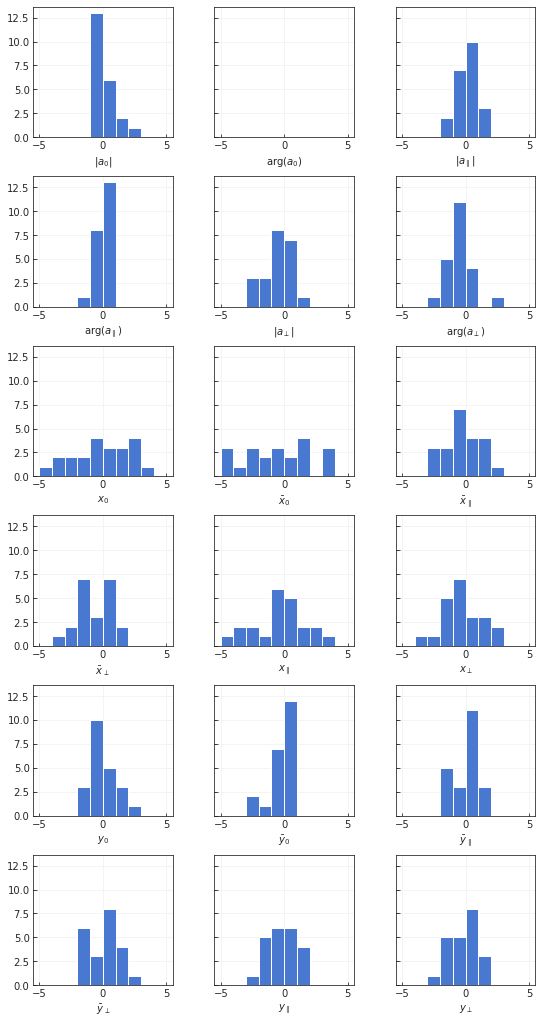

Plots for dir crscf_td_Kpi


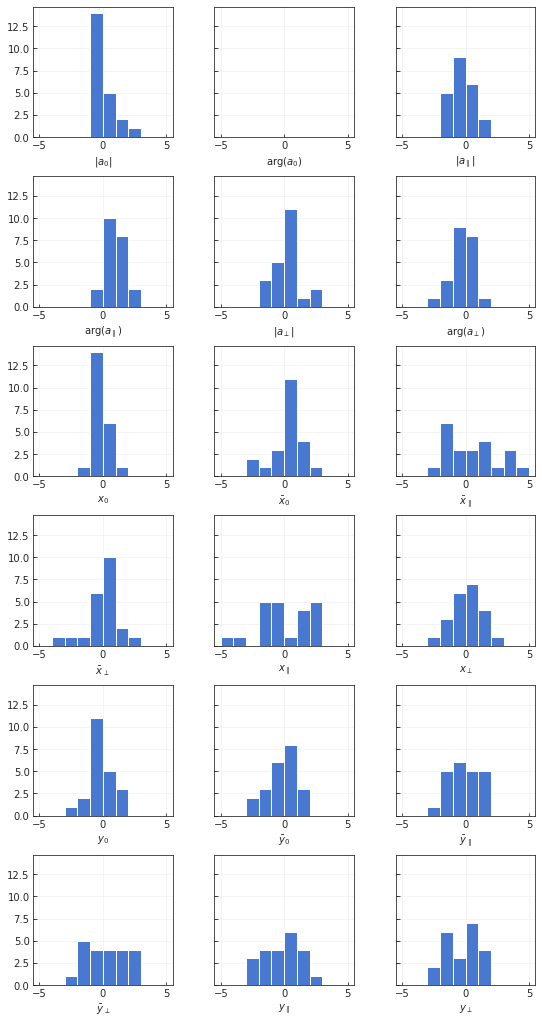

Plots for dir all_td_Kpi


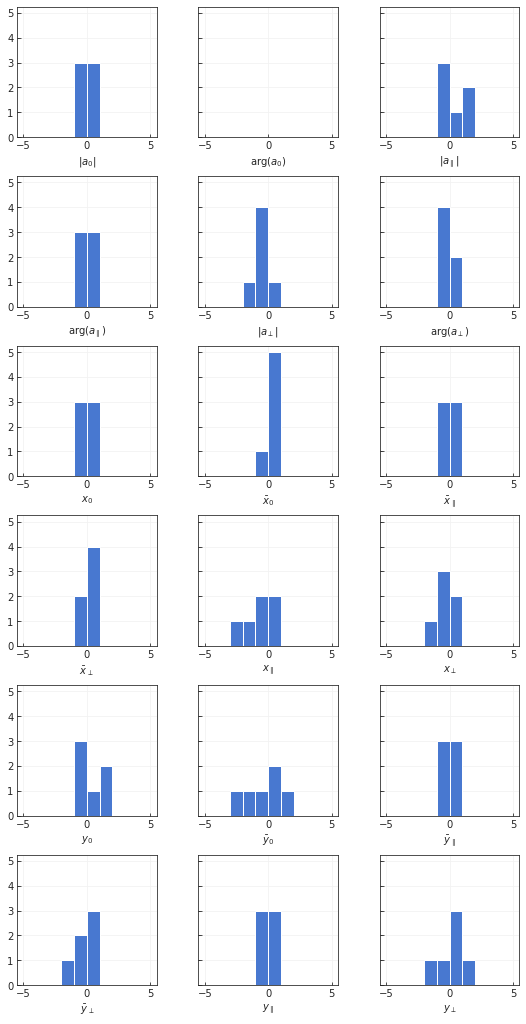

Plots for dir cr_td_Kpipi0


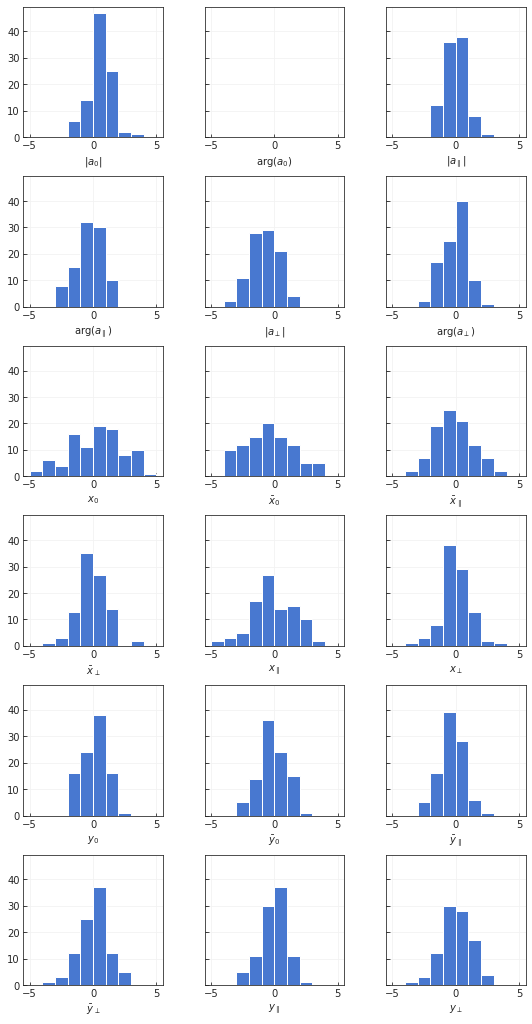

Plots for dir crscf_td_Kpipi0


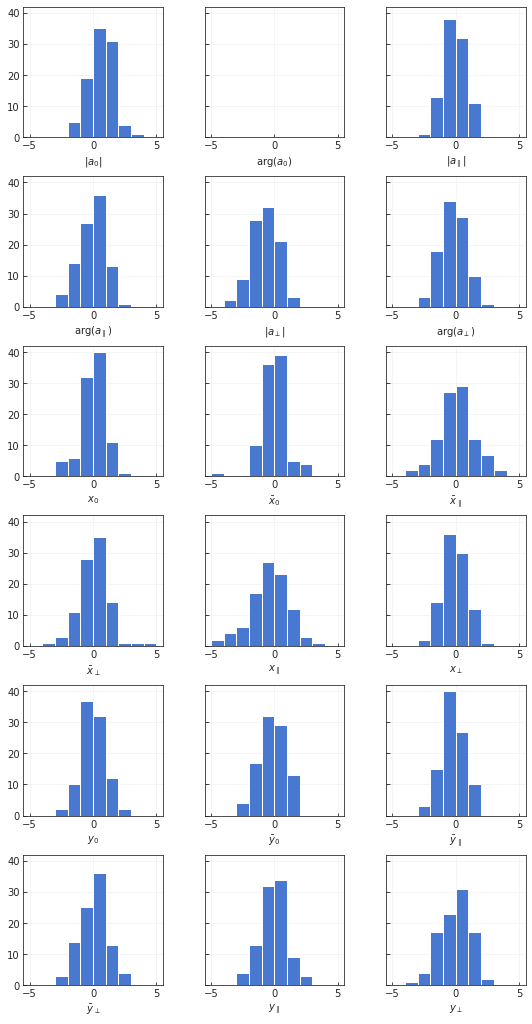

Plots for dir all_td_Kpipi0


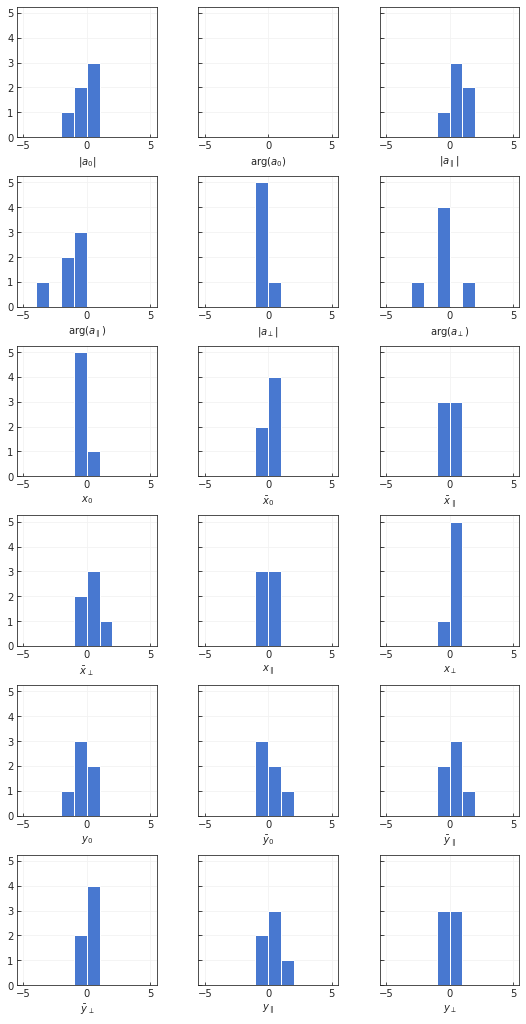

Plots for dir cr_td_K3pi


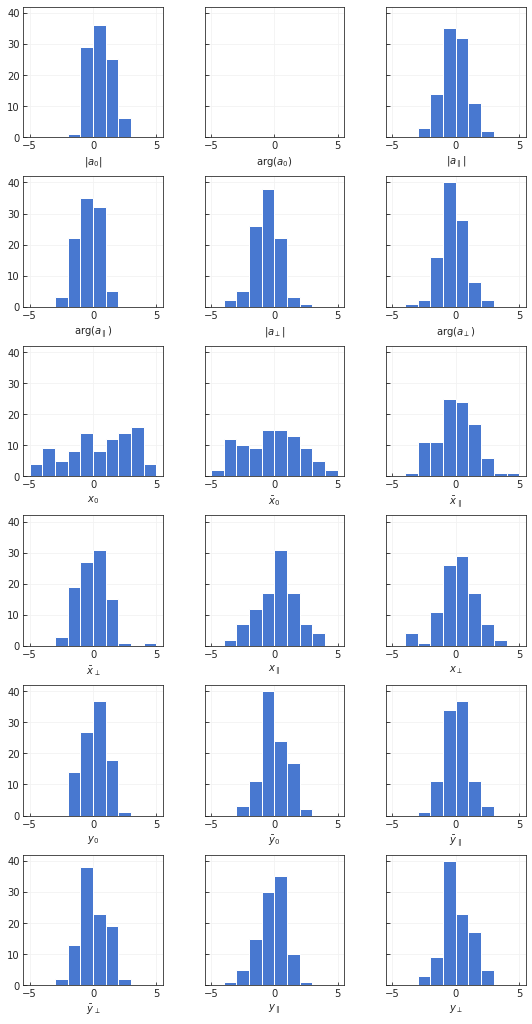

Plots for dir crscf_td_K3pi


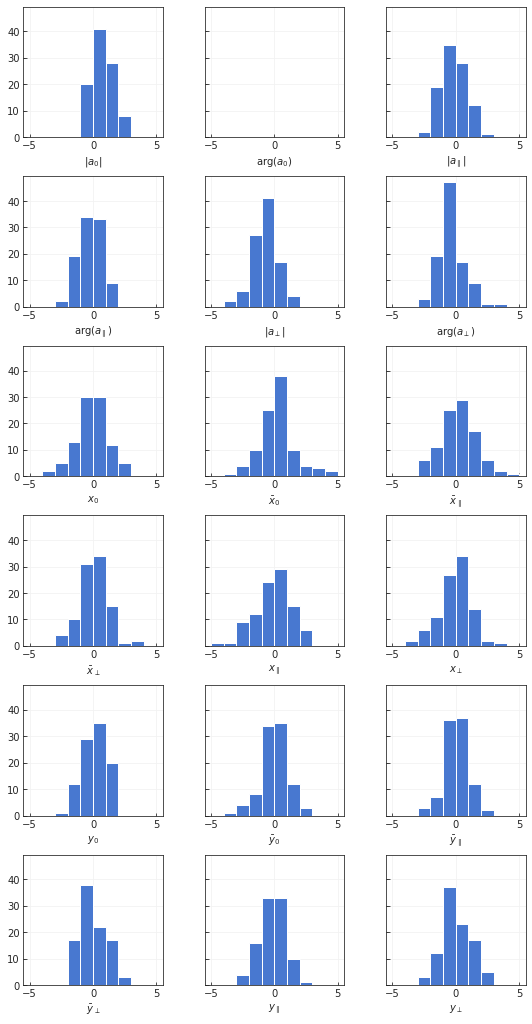

Plots for dir all_td_K3pi


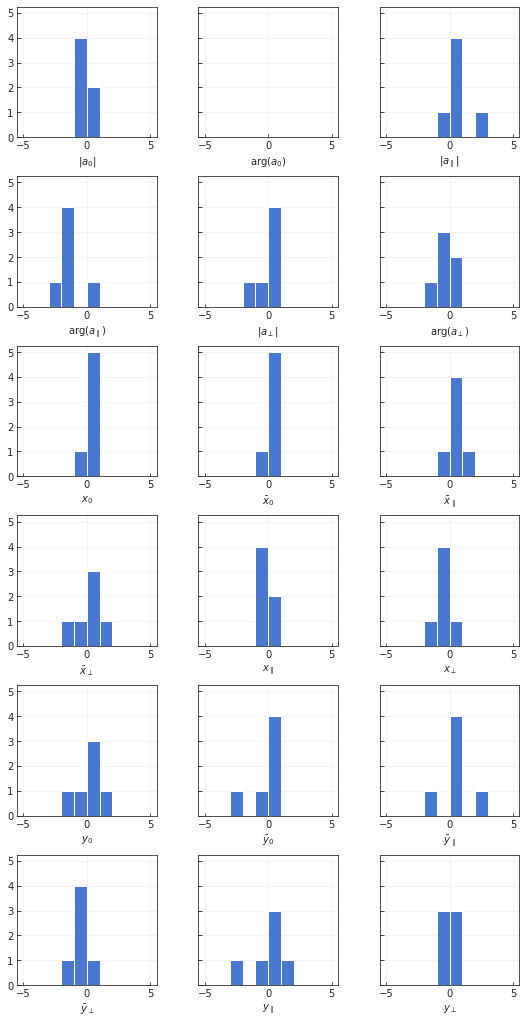

In [30]:
rows = 0
if time_dependent:
    rows = 6
else:
    rows = 2

plt.rcParams["figure.figsize"] = [9, rows * 3]
for i, dir in enumerate(dirs):
    axs = dfs_pulls[i].hist(column=list(var_names),
                            sharey=True, layout=(rows, 3), range=(-5, 5), bins=10)
    print("Plots for dir " + os.path.basename(dir))
    for ax in axs.flat:
        ax.set_xlabel(var_dict[ax.title.get_text()])
        ax.set_title("")
        
    plt.savefig(os.path.basename(dir) + "_pull_dist.pdf", bbox_inches = 'tight')
    plt.show()

In [9]:
class Gaussian(GenericLikelihoodModel):
    def __init__(self, endog, exog=None, **kwds):
        #if exog is None:
        #    exog = np.zeros_like(endog)
            
        super(Gaussian, self).__init__(endog, exog, **kwds)
    
    def nloglikeobs(self, params):
        loc = params[0]
        scale = params[1]

        return -np.log(norm.pdf(self.endog, loc=loc, scale=scale))
    
    def fit(self, start_params=None, maxiter=10000, maxfun=5000, **kwds):
        if start_params is None:
            loc_start = self.endog.mean()
            scale_start = self.endog.std()
            
            start_params = np.array([loc_start, scale_start])
            
        return super(Gaussian, self).fit(start_params=start_params,
                                         maxiter=maxiter, maxfun=maxfun, **kwds)

This fits the pull distributions with Gaussians and shows the uncertainties on the $\mu$ and $\sigma$ of each distribution. 

In [10]:
real_vars = list(var_names)
real_vars.remove('a0a')

for i, dir in enumerate(dirs):
    print("Results for dir " + dir)
    for var in real_vars:
        model = Gaussian(dfs_pulls[i][var]);
        results = model.fit(disp=False);
        print("{:4}: ({:+.2f} +- {:.2f}) +- ({:+.2f} +- {:.2f})".format(
            var, results.params[0], results.bse[0], results.params[1], results.bse[1]))
    print()

Results for dir ../results/cr_ti_Kpi
ap  : (+0.31 +- 0.21) +- (+0.99 +- 0.15)
apa : (-0.10 +- 0.18) +- (+0.87 +- 0.13)
a0  : (+0.11 +- 0.19) +- (+0.89 +- 0.13)
at  : (-0.48 +- 0.25) +- (+1.19 +- 0.18)
ata : (-0.01 +- 0.19) +- (+0.90 +- 0.14)

Results for dir ../results/crscf_ti_Kpi
ap  : (-0.10 +- 0.25) +- (+1.16 +- 0.17)
apa : (+0.72 +- 0.21) +- (+0.96 +- 0.15)
a0  : (-0.41 +- 0.19) +- (+0.91 +- 0.14)
at  : (+0.66 +- 0.28) +- (+1.33 +- 0.20)
ata : (+0.35 +- 0.19) +- (+0.90 +- 0.14)

Results for dir ../results/all_ti_Kpi
ap  : (+0.62 +- 0.35) +- (+0.86 +- 0.25)
apa : (-0.35 +- 0.21) +- (+0.50 +- 0.15)
a0  : (-0.27 +- 0.19) +- (+0.48 +- 0.14)
at  : (-0.34 +- 0.23) +- (+0.57 +- 0.17)
ata : (+0.29 +- 0.22) +- (+0.54 +- 0.16)

Results for dir ../results/cr_ti_Kpipi0
ap  : (+0.17 +- 0.09) +- (+0.89 +- 0.06)
apa : (-0.09 +- 0.11) +- (+1.07 +- 0.08)
a0  : (+0.23 +- 0.10) +- (+1.02 +- 0.07)
at  : (-0.51 +- 0.11) +- (+1.10 +- 0.08)
ata : (-0.42 +- 0.10) +- (+0.99 +- 0.07)

Results for dir ../re

We now calculate the relative errors $|\sigma/\mu|$ for each variable and dataset

In [11]:
# Calculate relative errors
dfs_relative_errors = []
for i in range(0, len(dirs)):
    df = dfs[i]
    df_relative_errors_dict = {var : abs(df[var + "_err"]/df[var + "_fit"]) for var in var_names}
    df_relative_errors = pd.DataFrame(df_relative_errors_dict)
    dfs_relative_errors.append(df_relative_errors)
#df_pulls = df_pulls.drop(list(var_names[0:6]), axis=1)

# Display relative errors in a table
for var in var_names:
    print("{:4}| ".format(var), end='')
    for i, dir in enumerate(dirs):
        print("{:7.2} | ".format(dfs_relative_errors[i].mean()[var]), end='')
    print()

ap  |  0.0095 |  0.0096 |   0.011 |   0.019 |   0.019 |   0.026 |   0.016 |   0.016 |    0.05 | 
apa |   0.028 |   0.027 |   0.033 |   0.056 |   0.057 |    0.11 |   0.046 |   0.047 |   0.084 | 
a0  | 0.00093 | 0.00094 |   0.001 |  0.0018 |  0.0019 |  0.0025 |  0.0015 |  0.0016 |  0.0047 | 
a0a |     nan |     nan |     nan |     nan |     nan |     nan |     nan |     nan |     nan | 
at  |   0.015 |   0.015 |   0.017 |    0.03 |    0.03 |   0.043 |   0.025 |   0.025 |   0.036 | 
ata |  0.0047 |  0.0047 |  0.0051 |  0.0095 |  0.0098 |   0.013 |  0.0078 |  0.0079 |  0.0095 | 


This might be useful if we want to plot the fitted Gaussian on top of the histograms.

tau = -0.096 +- 0.867 ps


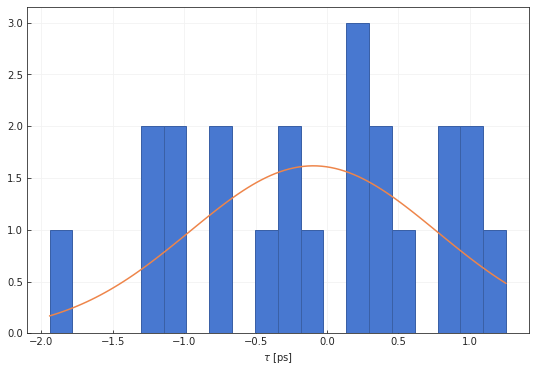

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("$\\tau$ [ps]")
#ax.set_xlim(1.5, 1.57)

data = dfs_pulls[0].apa

# Create histogram and calculate area under it for
# renormalization of fitted PDF
n, bins, patches = plt.hist(data, bins=20, edgecolor=darken_color(sns.color_palette("muted")[0], 0.8))
area = np.sum(np.diff(bins)*n)

mu, sigma = norm.fit(data)

# Create a bunch of equidistant points to calculate the 
# function values at (many points to make it look smooth)
x = np.linspace(data.min(), data.max(), 100)
norm_fitted = norm.pdf(x, mu, sigma)*area
plt.plot(x, norm_fitted)
print("tau = {:.3f} +- {:.3f} ps".format(mu, sigma))